### Récupération du dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

display(df)
df.info()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Gestion des doublons et des valeurs manquantes

In [2]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Vérification de la validité des données

CHAS
0    471
1     35
Name: count, dtype: int64
RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64


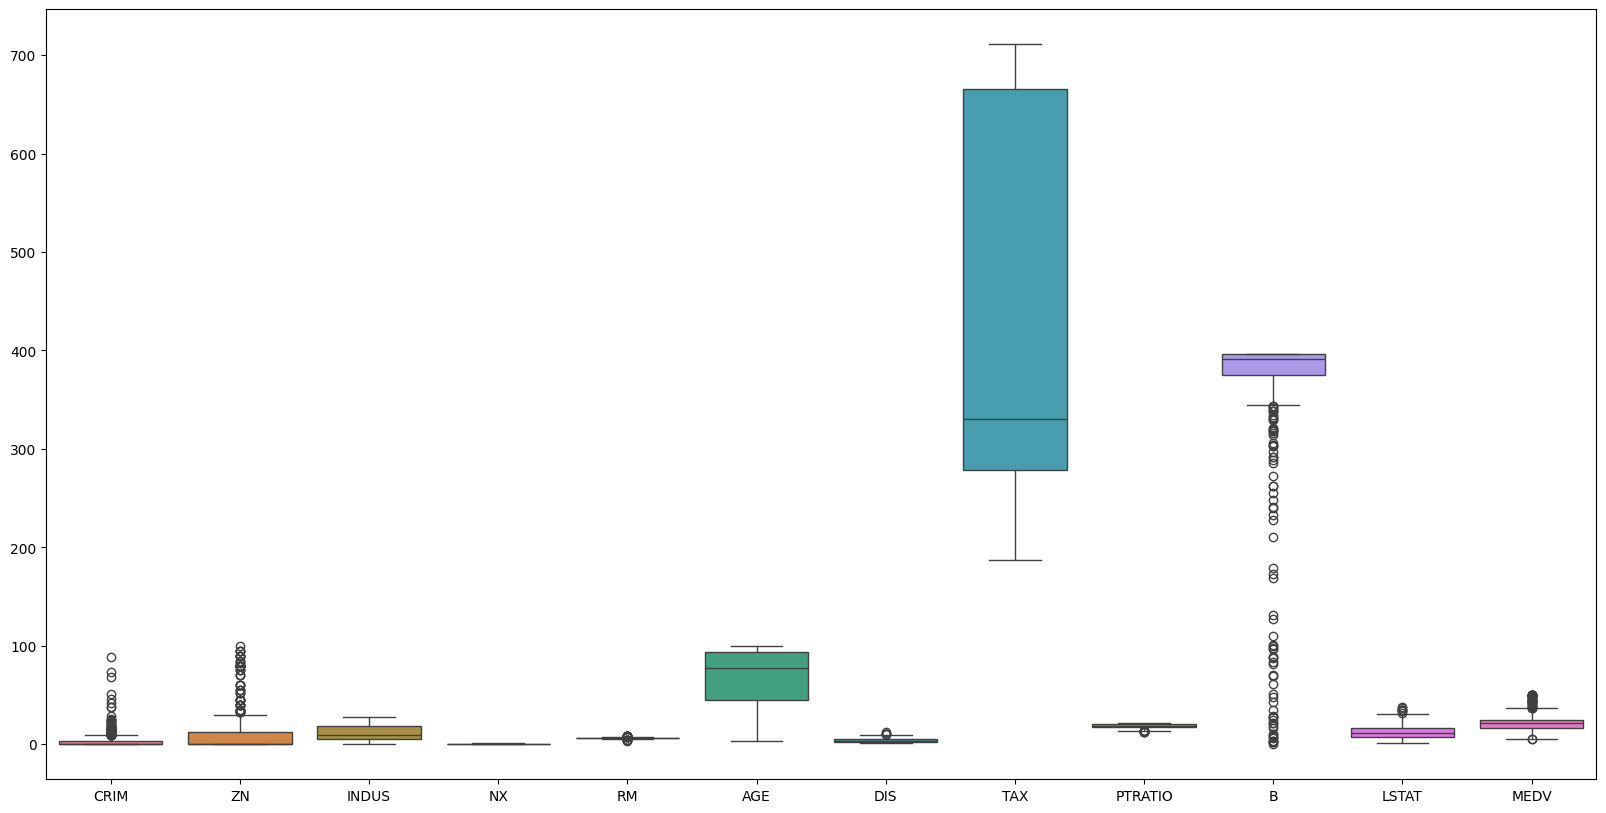

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier la distribution des données qualitatives
print (df['CHAS'].value_counts())
print (df['RAD'].value_counts())

# Vérifier la distribution des données quantitatives
plt.figure(figsize=(20, 10))
sns.boxplot(df.drop(['CHAS', 'RAD'], axis=1))
plt.show()
# Les données semblent cohérentes

### Analyse des relations entre les données

<Axes: >

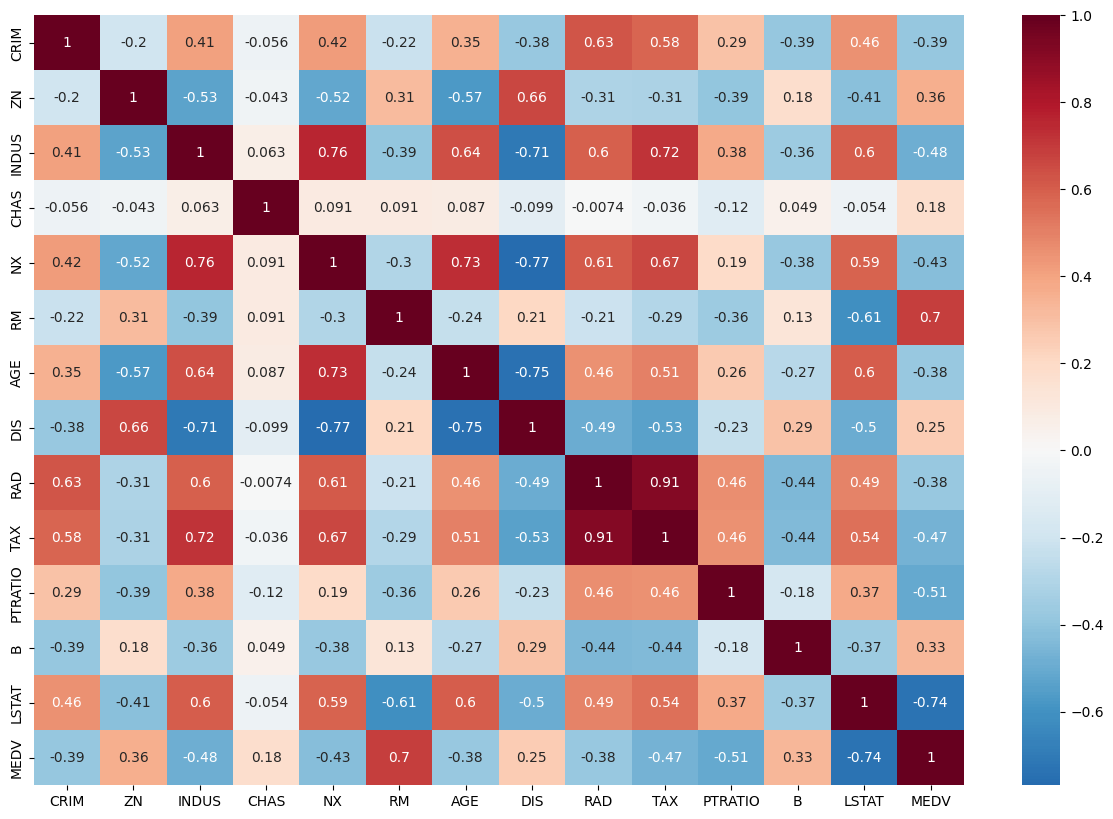

In [5]:
# Matrice de corrélation entre les différentes variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),center=0,cmap='RdBu_r',annot=True)

# Les variables TAX et RAD sont très fortement corrélées
# CHAS est très peu corrélée avec la cible MEDV

### Séparation train / test

In [6]:
# Séparation features / target
X = df.drop('MEDV',axis=1)
y = df['MEDV']

# Séparation training / testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sauvegarde
X_train_save = X_train
X_test_save = X_test

### Filtering Methods

#### Variance nulle

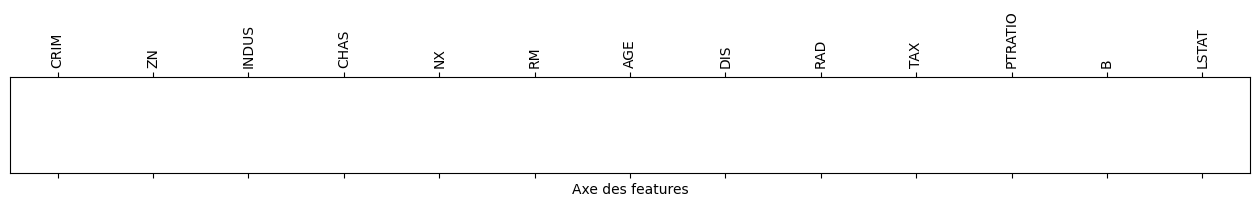

In [17]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(1e-6)
sel.fit(X_train)

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),labels=sel.feature_names_in_,rotation=90)
plt.yticks([])
plt.show()

# Toutes les features ont été conservées

#### SelectKBest

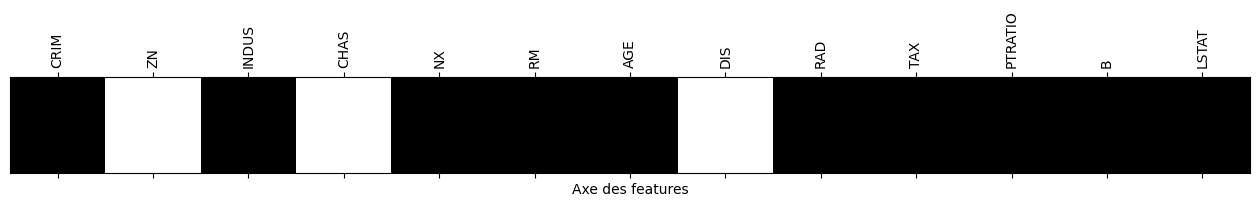

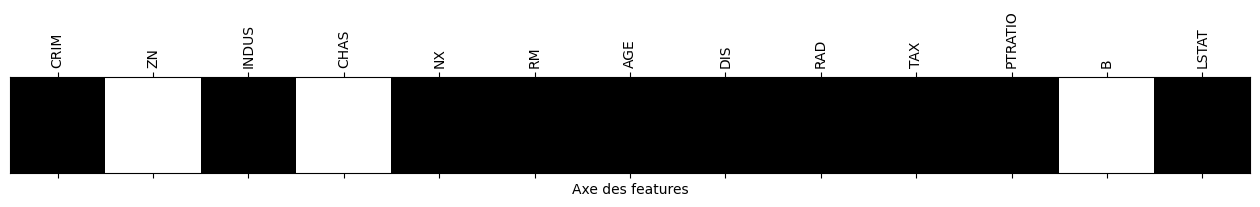

In [20]:
from sklearn.feature_selection import SelectKBest,f_regression, mutual_info_regression

# Sélection des 10 meilleures features selon score de f-test
sel = SelectKBest(f_regression,k=10)
sel.fit(X_train,y_train)

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),labels=sel.feature_names_in_,rotation=90)
plt.yticks([])
plt.show()

# Sélection des 10 meilleures features selon score de Mutual Info
sel = SelectKBest(mutual_info_regression,k=10)
sel.fit(X_train,y_train)

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),labels=sel.feature_names_in_,rotation=90)
plt.yticks([])
plt.show()

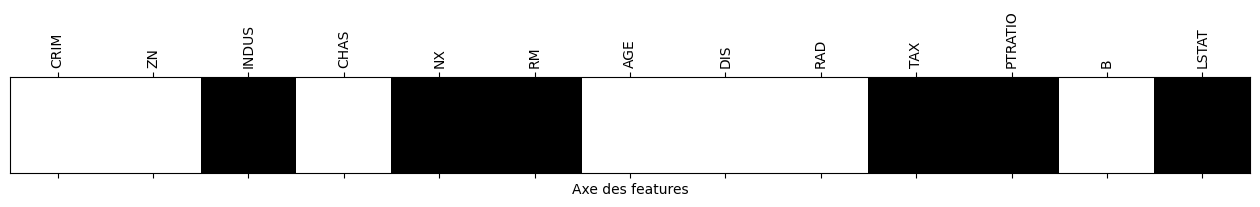

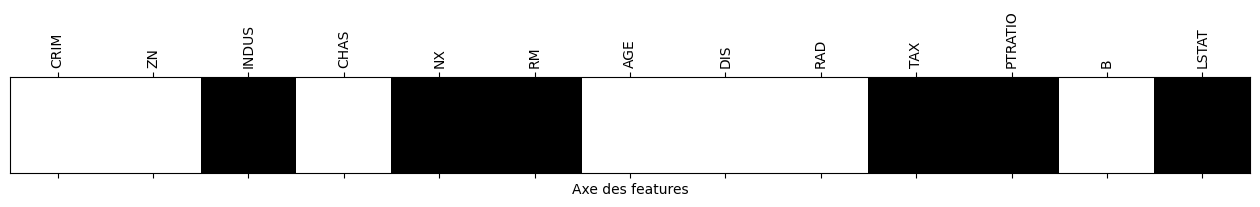

In [21]:
from sklearn.feature_selection import SelectPercentile

# Sélection des 50% meilleures features selon score de f-test
sel = SelectPercentile(f_regression,percentile=50)
sel.fit(X_train,y_train)

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),labels=sel.feature_names_in_,rotation=90)
plt.yticks([])
plt.show()

# Sélection des 50% meilleures featuresselon score de Mutual Info
sel = SelectPercentile(mutual_info_regression,percentile=50)
sel.fit(X_train,y_train)

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),labels=sel.feature_names_in_,rotation=90)
plt.yticks([])
plt.show()

### Wrapped methods

#### Recursive Feature Elimination

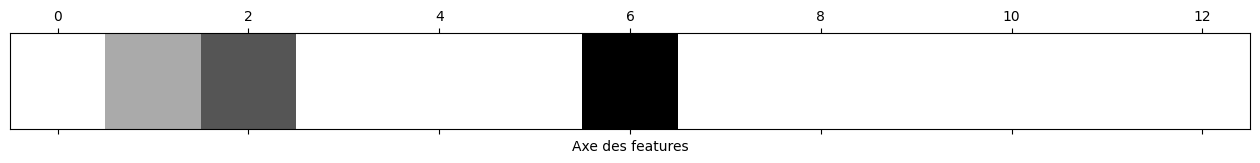

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Standardisation préalable
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

# RFE basé sur régression linéaire => retrait d'une feature à la fois, conservation de 10
lm = LinearRegression()
rfe = RFE(lm,step=1,n_features_to_select=10)
rfe.fit(X_train,y_train)

# Représentation graphique des features retirées au fur et à mesure
mask = rfe.ranking_
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.yticks([])
plt.show()

# Retrait AGE puis INDUS puis ZN


#### RFE CV

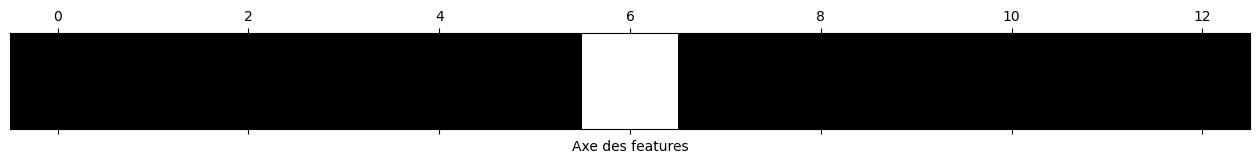

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# RFE CV basé sur régression linéaire => 5 folds avec mélange
crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)
rfecv = RFECV(lm,cv=crossval)
rfecv.fit(X_train,y_train)

# Représentation graphique des features conservées
mask = rfecv.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.yticks([])
plt.show()

# Retrait AGE uniquement d'après le meilleur score en validation croisée

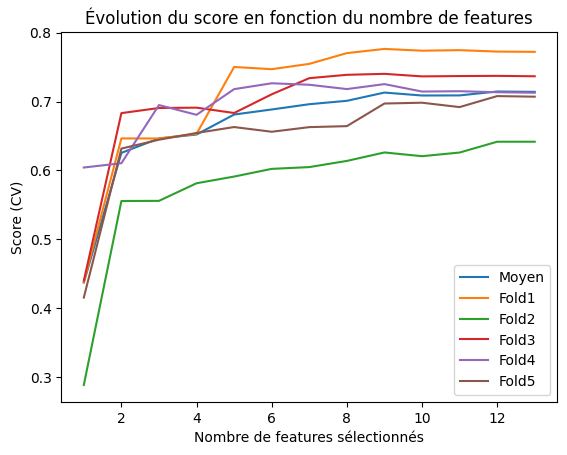

Nb features retenues : 12


In [30]:
abs_nb_features = range(1, len(rfecv.cv_results_['mean_test_score']) + 1)

plt.plot(abs_nb_features,rfecv.cv_results_['mean_test_score'],label="Moyen")
for i in range(5):
    plt.plot(abs_nb_features,rfecv.cv_results_[f"split{i}_test_score"],label=f"Fold{i+1}")
plt.legend()
plt.xlabel("Nombre de features sélectionnés")
plt.ylabel("Score (CV)")
plt.title("Évolution du score en fonction du nombre de features")
plt.show()

print ("Nb features retenues :",rfecv.n_features_)

### Embedded Methods

#### SelectFromModel

Best alpha : 0.015856481375804393
[-0.95821902  0.61760293  0.13409426  0.72087187 -1.92229592  3.15506849
 -0.13987456 -2.97053792  1.96643152 -1.48288885 -2.00850663  1.11068664
 -3.60790638]


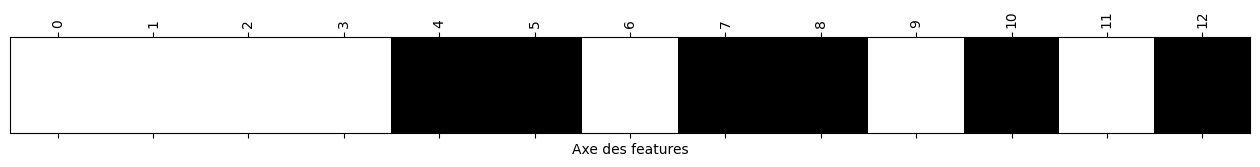

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Utilisation modèle Lasso en validation croisée (pour déterminer le meilleur coefficient de régularisation alpha)
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv=10)
lcv.fit(X_train, y_train)
print ("Best alpha :",lcv.alpha_)
print(lcv.coef_)

# On élimine les features avec des poids < moyenne
# Pas besoin de faire de fit supplémentaire
sel = SelectFromModel(lcv,prefit=True,threshold="mean") # Dans le cas d'un grid search, utiliser model.best_estimator_

# Représentation graphique des features conservées
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
#matshow permet d'afficher un array numpy sous la forme d'une matrice
plt.xlabel('Axe des features')
plt.xticks(np.arange(13),rotation=90)
plt.yticks([])
plt.show()
